In [41]:
import pandas as pd
import seaborn as sns

In [42]:
#Install Certificates.command for macOS
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [43]:
#данные о подписке
netflix_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1-cVvgPHbcqMStoUVEPkJzSk0DFqh5RG-npKckyF9q0s/export?gid=2050417244&format=csv')

In [44]:
netflix_data

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


In [74]:
ppp = pd.read_csv('https://docs.google.com/spreadsheets/d/1GcaNLhEBp8N6jysbIxdUxuEqD74Kq4EmuKX7JyXRYZY/export?gid=0&format=csv')
ppp['Country'] = ppp['Country'].apply(lambda x: x.replace("*", "")) #удаляем * из дата сета
ppp = ppp.replace('Czech Republic','Czechia',regex=True) #Приводим Чехию к единому названию
ppp

,Country,Subregion,Region,PPP,year
0,Liechtenstein,Western Europe,Europe,"139,1",2009.0
1,Luxembourg,Western Europe,Europe,"114,482",2019.0
2,Monaco,Western Europe,Europe,"115,7",2015.0
3,Singapore,South-eastern Asia,Asia,"97,341",2019.0
4,Ireland,Northern Europe,Europe,"86,781",2019.0
...,...,...,...,...,...
223,Malawi,Eastern Africa,Africa,"1,06",2019.0
224,DR Congo,Middle Africa,Africa,"1,098",2019.0
225,Central African Republic,Middle Africa,Africa,945,2019.0
226,Somalia,Eastern Africa,Africa,NaN,NaN


In [75]:
ppp['Country'] = ppp['Country'].astype(str).str.strip() #убираем пробелы и приводим к типу строка
netflix_data['Country'] = netflix_data['Country'].astype(str) #приводим к типу строка
netflix_data['Cost Per Month - Basic ($)'] = netflix_data['Cost Per Month - Basic ($)'].astype(float) #приводим к типу флоат 
ppp['Country'] = ppp['Country'].astype(str) #Приводим к типу флоат

In [83]:
#Дата сет с валютами стран
currency = pd.read_csv('https://docs.google.com/spreadsheets/d/1bPihM9GfQOvvGNO6P2Hl5VwSW4QjWZzn60eBLPbyB-c/export?gid=0&format=csv')
currency = currency.replace('Czech Republic','Czechia',regex=True) #Приводим Чехию к единому названию

In [84]:
currency

,Country,ISO Code
0,Afghanistan,AFN
1,Albania,ALL
2,Algeria,DZD
3,Andorra,EUR
4,Angola,AOA
...,...,...
193,Venezuela,VEF
194,Vietnam,VND
195,Yemen,YER
196,Zambia,ZMW


In [85]:
#СОбираем единую таблицу. Лефтджойним к данным Netflix
df = pd.merge(netflix_data, ppp, how='left', left_on='Country', right_on='Country')
df = pd.merge(df, currency, how='left', left_on='Country', right_on='Country')
df

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Subregion,Region,PPP,year,ISO Code
0,Argentina,4760,3154,1606,3.74,6.30,9.26,South America,Americas,"22,064",2019.0,ARS
1,Austria,5640,3779,1861,9.03,14.67,20.32,Western Europe,Europe,"56,188",2019.0,EUR
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,South America,Americas,"8,724",2019.0,BOB
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,Eastern Europe,Europe,"23,174",2019.0,BGN
4,Chile,4994,3156,1838,7.07,9.91,12.74,South America,Americas,"24,226",2019.0,CLP
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,Northern Europe,Europe,"86,781",2019.0,EUR
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,Western Europe,Europe,"68,628",2019.0,CHF
62,Australia,6114,4050,2064,7.84,12.12,16.39,"Australia, New Zealand",Oceania,"49,854",2019.0,AUD
63,Denmark,4558,2978,1580,12.00,15.04,19.60,Northern Europe,Europe,"57,804",2019.0,DKK


In [86]:
#Приводим ppp к нужному формату
df = df.replace(',','.',regex=True)
pd.to_numeric(df['PPP'])

0     22.064
1     56.188
2      8.724
3     23.174
4     24.226
       ...  
60    86.781
61    68.628
62    49.854
63    57.804
64    62.530
Name: PPP, Length: 65, dtype: float64

In [87]:
#Проверяем типы переменных
df.dtypes

Country                           object
Total Library Size                 int64
No. of TV Shows                    int64
No. of Movies                      int64
Cost Per Month - Basic ($)       float64
Cost Per Month - Standard ($)    float64
Cost Per Month - Premium ($)     float64
Subregion                         object
Region                            object
PPP                               object
year                             float64
ISO Code                          object
dtype: object

#### Строим графики корреляций

Видим, что средний доход в стране и стоимость подписки коррелируют. При этом для базового тарифа Netflix предпочитает ставить $9

<AxesSubplot:xlabel='Cost Per Month - Basic ($)', ylabel='PPP'>

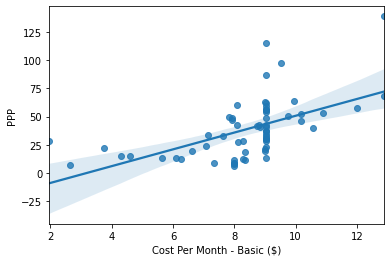

In [88]:
sns.regplot(x=df['Cost Per Month - Basic ($)'], y=pd.to_numeric(df['PPP']))

<AxesSubplot:xlabel='Cost Per Month - Standard ($)', ylabel='PPP'>

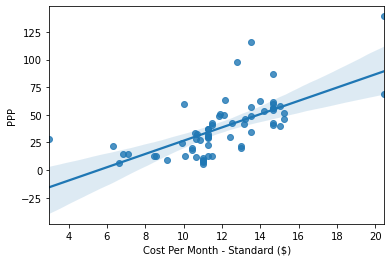

In [82]:
sns.regplot(x=df['Cost Per Month - Standard ($)'], y=pd.to_numeric(df['PPP']))

<AxesSubplot:xlabel='Cost Per Month - Premium ($)', ylabel='PPP'>

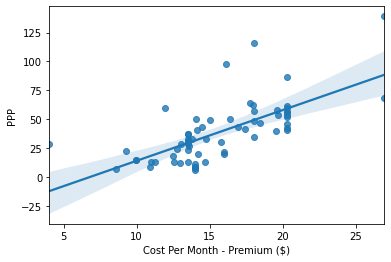

In [15]:
sns.regplot(x=df['Cost Per Month - Premium ($)'], y=pd.to_numeric(df['PPP']))

#### Вопрос 1: Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [89]:
df.groupby(['ISO Code']).agg({'Cost Per Month - Basic ($)': 'mean', 'Cost Per Month - Standard ($)': 'mean', 'Cost Per Month - Premium ($)': 'mean'})

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
ISO Code,,,
ARS,3.740000,6.300000,9.260000
AUD,7.840000,12.120000,16.390000
BGN,9.030000,11.290000,13.540000
BOB,7.990000,10.990000,13.990000
BRL,4.610000,7.110000,9.960000
CAD,7.910000,11.870000,15.030000
CHF,12.880000,20.460000,26.960000
CLP,7.070000,9.910000,12.740000
COP,4.310000,6.860000,9.930000


#### Вопрос 2: Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [17]:
df.groupby(['Region']).agg({'Cost Per Month - Basic ($)': 'mean', 'Cost Per Month - Standard ($)': 'mean', 'Cost Per Month - Premium ($)': 'mean'})

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Region,,,
Africa,6.260000,10.050000,12.580000
Americas,7.223750,10.465625,13.548750
Asia,7.636667,10.404167,12.966667
Europe,9.230294,13.304412,17.545588
Oceania,8.320000,12.325000,16.665000


#### Вопрос 3: Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [70]:
#Доля стоимости годовой подписки на базовый тариф нетфликса относительно среднего дохода
Cz_df_1 = (df[df['Country'] == 'Czechia']['Cost Per Month - Basic ($)']*12) / (pd.to_numeric(df[df['Country'] == 'Czechia']['PPP'])*1000)


In [71]:
#Доля стоимости годовой подписки на стандартный тариф нетфликса относительно среднего дохода
Cz_df_2 = (df[df['Country'] == 'Czechia']['Cost Per Month - Standard ($)']*12) / (pd.to_numeric(df[df['Country'] == 'Czechia']['PPP'])*1000)


In [72]:
#Доля стоимости годовой подписки на премиум тариф нетфликса относительно среднего дохода
Cz_df_3 = (df[df['Country'] == 'Czechia']['Cost Per Month - Premium ($)']*12) / (pd.to_numeric(df[df['Country'] == 'Czechia']['PPP'])*1000)



In [73]:
Cz_df = pd.concat([Cz_df_1, Cz_df_2, Cz_df_3], ignore_index=True)
Cz_df

0    0.002593
1    0.003374
2    0.004155
dtype: float64

#### Вопрос 4: Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [23]:
(df.nlargest(5, 'No. of TV Shows'))['Country']

8            Czechia
36          Slovakia
3           Bulgaria
50           Hungary
57    United Kingdom
Name: Country, dtype: object

#### Вопрос 5: Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [24]:
# Процент от среднего дохода россиянина за годовую базовую Netflix подписку
(df[df['Country'] == 'Russia']['Cost Per Month - Basic ($)']*12) *100 / (pd.to_numeric(df[df['Country'] == 'Russia']['PPP'])*1000)


34    0.360745
dtype: float64

In [25]:
# Процент от среднего дохода россиянина за годовую стандартную Netflix подписку
(df[df['Country'] == 'Russia']['Cost Per Month - Standard ($)']*12) * 100/ (pd.to_numeric(df[df['Country'] == 'Russia']['PPP'])*1000)


34    0.480994
dtype: float64

In [26]:
# Процент от среднего дохода россиянина за годовую премиум Netflix подписку
(df[df['Country'] == 'Russia']['Cost Per Month - Premium ($)']*12) * 100/ (pd.to_numeric(df[df['Country'] == 'Russia']['PPP'])*1000)

34    0.601686
dtype: float64

#### Вопрос 6: На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

Россия будет на 18 месте для стандартной подписки(17+1, нулевой индекс)

In [93]:
df['Cost Per Title'] = df['Cost Per Month - Standard ($)']/ df['Total Library Size']

In [94]:
df = df.sort_values(by='Cost Per Title')
df.reset_index(inplace = True)

In [95]:
df[df['Country'] == 'Russia']

,index,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Subregion,Region,PPP,year,ISO Code,Cost Per Title
17,34,Russia,5711,3624,2087,8.13,10.84,13.56,Eastern Europe,Europe,27.044,2019.0,RUB,0.001898


#### Вопрос 7: В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?
 

Лучше всего брать в Турции

In [90]:
df.nsmallest(1, 'Cost Per Month - Basic ($)')['Country']

41    Turkey
Name: Country, dtype: object

In [91]:
df.nsmallest(1, 'Cost Per Month - Standard ($)')['Country']

41    Turkey
Name: Country, dtype: object

In [92]:
df.nsmallest(1, 'Cost Per Month - Premium ($)')['Country']

41    Turkey
Name: Country, dtype: object